# Cars4U

## Background

The car industry is split into two  sectors.  There are new and used cars.  In the Indian Market, there is a growing demand for used cars as a result of the decrease in sales of new vehicles.  In 2018-2019, used cars sales surpassed new cars.  Considering that the price is quite inelastic for new cars, as decided by OEMs (Original Equipment Manufacturers), it opens up a market for used car sales.  In the case of new vehicles, the price is set, and then the dealerships will sell for around that price.  Used cars, however, are completely different.  There is a large variance in the supply and demand for these vehicles, and it could be based on many different factors.  Cars4U is an up and coming start-up company, and they are hoping to find open areas in the used car market.

## Key Question to Answer

How can we develop a pricing model to predict the price of used cars on behalf of Cars4U? When finished, the model will be able to give their business a lucrative strategy when selling used vehicles.  When a dealership knows the market price, they would be foolish to sell below that price.

## Dataset
#### The lines below give a brief definition of each variable in the dataset:
S.No.: Serial Number.

Name: Name of the car which includes Brand name and Model name.

Location: The location in which the car is being sold or is available for purchase Cities.

Year: Manufacturing year of the car.

Kilometers_Driven: The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG).

Transmission: The type of transmission used by the car. (Automatic / Manual).

Owner: Type of ownership.

Mileage: The standard mileage offered by the car company in kmpl or km/kg.

Engine: The displacement volume of the engine in CC.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000).

Price: The price of the used car in INR Lakhs (1 Lakh = 100, 000).

In [1]:
# To help make our code look less cluttered, this removes the warnings that pop up.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the packages for this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Reading our dataset titled "used_cars_data.csv".
file=pd.read_csv("used_cars_data.csv")

# Making a copy of the dataset, so we are not making any changes to the original file.
data=file.copy()

### Preprocessing

In [4]:
# Viewing the first 5 rows of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
# Viewing the last 5 rows of the dataset
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
# Looking at the shape of the dataset
data.shape

(7253, 14)

#### Observations
We have 7253 rows, and 14 columns.  There are a few standout variables that I think are acceptable to drop.  S.No. and Name are redundant, and they will not factor into our pricing model. I will drop these now.

In [7]:
# Let's get an understanding on missing values in our dataset
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

#### Observations
6247/7253 are missing for New_Price.  This is going to cause issues for imputing.  It would be bad practice to impute a specific value for such a large portion of the data.  I will decide on this later.

In [8]:
# Looking at the shape of the dataset
data.shape

In [ ]:
# Let's drop S.No. and Name.  They do not really matter for pricing models.
data.drop(['S.No.'], axis = 1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


#### Observations
We see that S.No. has been removed from our dataset.

In [10]:
# Removing units from some of the variables, so the values are numerical
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '')
data['Mileage'] = data['Mileage'].str.replace(' km/kg', '')
data['Engine'] = data['Engine'].str.replace(' CC', '')
data['Power'] = data['Power'].str.replace(' bhp', '')
data['Power'] = data['Power'].str.replace('null', '')

In [11]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


#### Observation

We can see now, the variables Mileage, Engine, and Power, no longer have units following their numbers.

In [12]:
# Let's take care of the New_Price variable's units.
price_cols = []
for colname in data.columns[data.dtypes == 'object']:
    if data[colname].str.endswith('Cr').any():
        price_cols.append(colname)
print(price_cols)

['New_Price']


In [13]:
# Defining a function to convert the currencies to match the same amount.
def price_to_num(money_val):
    if isinstance(money_val, str):
        multiplier = 1  
        if money_val.endswith('Cr'):
            multiplier = 100
        elif money_val.endswith('Lakh'):
            multiplier = 1
        return float(money_val.replace('Cr', '').replace('Lakh', '')) * multiplier
                     
for colname in price_cols:
    data[colname] = data[colname].apply(price_to_num)
    
data[price_cols].head()

,New_Price
0,NaN
1,NaN
2,8.61
3,NaN
4,NaN


#### Observations
The unites Cr and Lakh have been removed form New_Price column.

In [14]:
# Now let's take care of Power. I am going to impute the missing values with the mean value of the sample.
print(data['Power'].isnull().sum())

46


In [15]:
# Changing it to a float data type; this is so I can replace with the mean.
data['Power'] = data['Power'].astype(str).replace('', np.NaN).astype('float64')

In [16]:
# Replacing the 46 null values with the mean
data['Power'].fillna(data['Power'].mean(), inplace=True)
print(data['Power'].isnull().sum())

0


#### Observation
We now can see that there are no longer any null values for Power.

In [17]:
# Now let's take care of Seats. I am going to replace the missing values with the most frequent value (mode).
print(data['Seats'].isnull().sum())

53


In [18]:
# Finding the mode for Seats
print(data['Seats'].mode())

0    5.0
dtype: float64


#### Observation
There are 53 blank values that are going to be replaced with the mode, 5.

In [19]:
data['Seats'] = data['Seats'].astype(str).replace('', np.NaN).astype('float64')

In [20]:
# There are some 0's in the Seats column, I am dropping these because that is impossible.
data= data[data['Seats'] != 0]

In [21]:
# Replacing blanks with the mode, 5
data['Seats'] = data['Seats'].astype(str).replace('nan', '5.0').astype('object')

#### Observation
Considering this is a categorical variable, it is safe to impute the most frequent value I replaced the blank entries with the mode value, 5.

In [22]:
# Now let's work on Engine's missing values
print(data['Engine'].isnull().sum())

46


In [23]:
# Converting Engine to a float so I can impute the mean
data['Engine'] = data['Engine'].astype(str).replace('', np.NaN).astype('float64')

In [24]:
# Imputing the mean
data['Engine'].fillna(data['Engine'].mean(), inplace=True)

In [25]:
print(data['Engine'].isnull().sum())

0


In [26]:
# After viewing the dataset, I am manually dropping one row with a value of 72.  This is an extreme missing value
data= data[data['Engine'] != 72]

In [27]:
# Next let's work on Mileage. 
print(data['Mileage'].isnull().sum())

1


In [28]:
# Converting Mileage to a float so I can impute the mean
data['Mileage'] = data['Mileage'].astype(str).replace('', np.NaN).astype('float64')

In [29]:
# Imputing the mean
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)

In [30]:
print(data['Mileage'].isnull().sum())

0


In [31]:
# There are some 0's in the Mileage column, I am dropping these because that is impossible.
data= data[data['Mileage'] != 0]

In [32]:
data.shape

(7170, 13)

In [33]:
# Changing the data types of our variables to the appropriate datatype
data["Power"]=data["Power"].astype(float)
data["Mileage"]=data["Mileage"].astype(float)
data["Engine"]=data["Engine"].astype(float)
data["Seats"]=data["Seats"].astype("category")
data["Kilometers_Driven"]=data["Kilometers_Driven"].astype(float)
data["Transmission"]=data["Transmission"].astype("category")
data["Location"]=data["Location"].astype("category")
data["Owner_Type"]=data["Owner_Type"].astype("category")
data["Fuel_Type"]=data["Fuel_Type"].astype("category")
data["Year"]=data["Year"].astype("category")
data["Name"]=data["Name"].astype("string")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7170 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7170 non-null   string  
 1   Location           7170 non-null   category
 2   Year               7170 non-null   category
 3   Kilometers_Driven  7170 non-null   float64 
 4   Fuel_Type          7170 non-null   category
 5   Transmission       7170 non-null   category
 6   Owner_Type         7170 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7170 non-null   float64 
 9   Power              7170 non-null   float64 
 10  Seats              7170 non-null   category
 11  New_Price          1001 non-null   float64 
 12  Price              5949 non-null   float64 
dtypes: category(6), float64(6), string(1)
memory usage: 492.2 KB


## Data Visualization

In [35]:
# Giving us some basic numbers in regards to our dataset. ".T" is to transpose the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7170.0,58557.712971,84782.431566,171.00,34000.000,53164.00,73000.00,6500000.00
Mileage,7170.0,18.347593,4.156878,6.40,15.300,18.20,21.10,33.54
Engine,7170.0,1615.651749,590.915723,624.00,1198.000,1493.00,1968.00,5998.00
Power,7170.0,112.672966,52.958545,34.20,76.825,98.60,138.03,616.00
New_Price,1001.0,22.680080,27.773499,3.91,7.880,11.48,25.52,375.00
Price,5949.0,9.455724,11.139231,0.44,3.500,5.65,9.90,160.00


#### Observation
For Kilometers Driven, the mean is greater than the median, indicating a right skew.

For Mileage, the mean is essentially equal to the median.

For Engine, the mean is slightly greater than the median, indicating a right skew.

For Power, the mean is greater than the median, indicating a right skew.

For Price, the mean is much greater than the median, indicating a right skew.

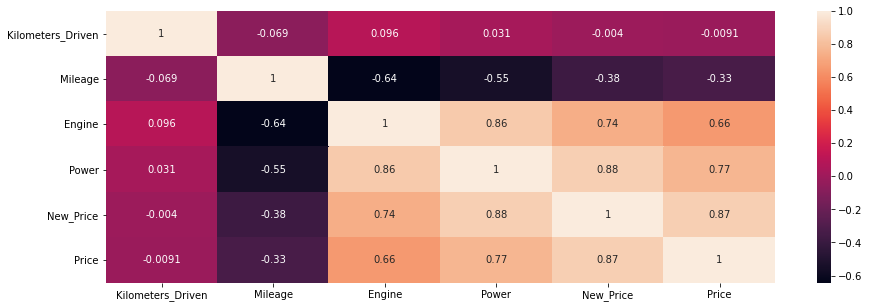

In [36]:
# Let's take a look at variable correlation via a heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

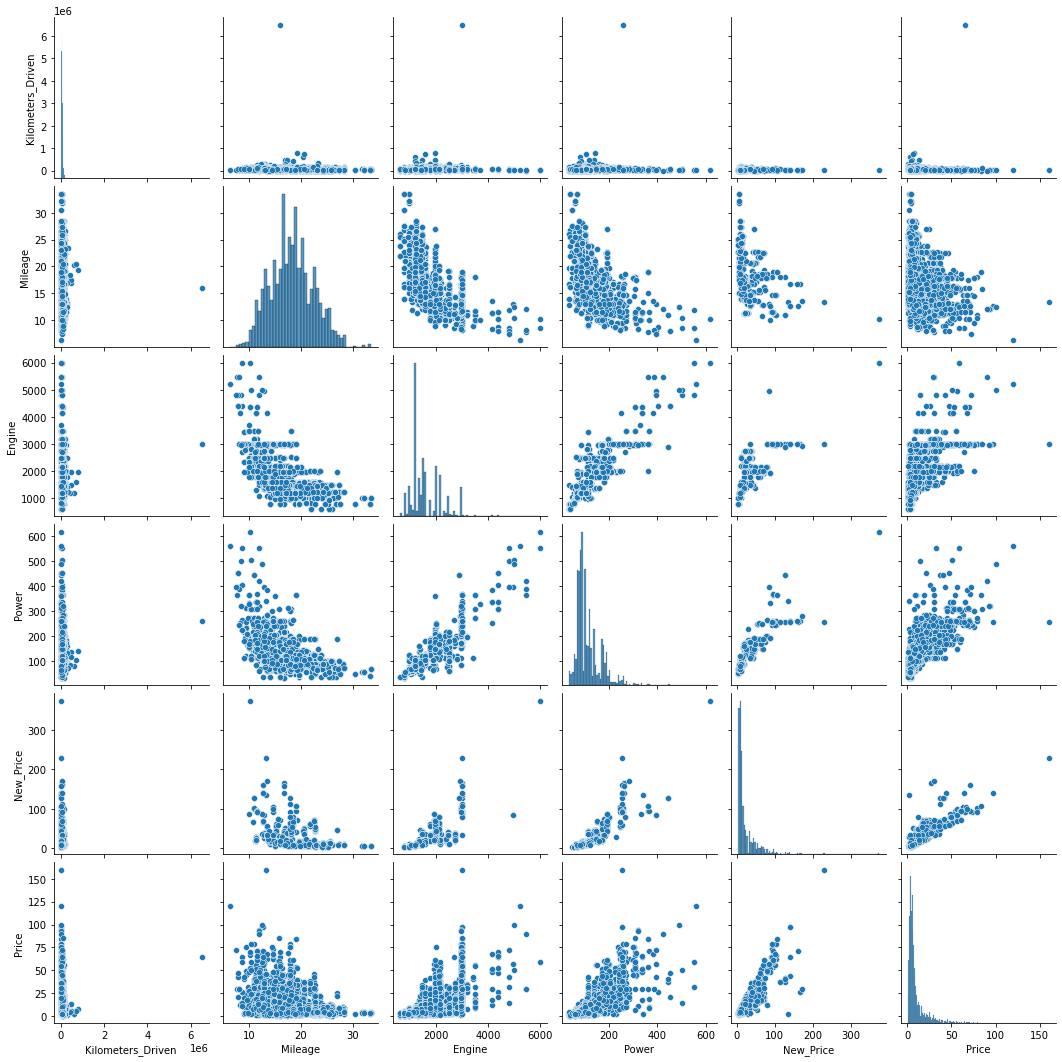

In [37]:
# I am also using a pairplot to get some basic visualizations on correlation between variables.
sns.pairplot(data)
plt.show()

#### Observation
We see negative correlation with Mileage and Power

We see negative correlation with Mileage and Engine

We see Positive correlation with Engine and Power

We see Positive correlation with Power and Price

We see Positive correlation with Power and New_Price

We see Positive correlation with New_Price and Price


In [38]:
# Let's look at correlation for Price specifically because we are trying to build a model on Price
data[data.columns[:]].corr()["Price"][:]

Kilometers_Driven   -0.009150
Mileage             -0.333136
Engine               0.657970
Power                0.771384
New_Price            0.871573
Price                1.000000
Name: Price, dtype: float64

#### Observations
It's unfortunate that we are missing so many of New_Price, as there is a strong correlaton with Price.  Power and Engine are also strong.

<AxesSubplot:xlabel='Location', ylabel='count'>

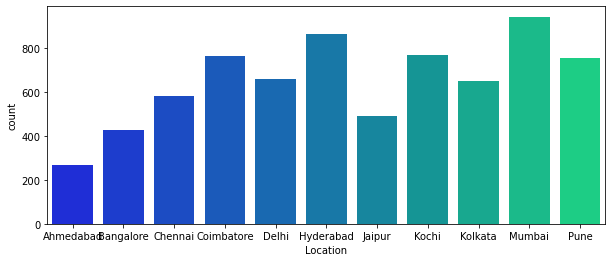

In [39]:
# Univariate distribution to show the age amongst the sample via countplot
plt.figure(figsize=(10,4))
sns.countplot(data['Location'], palette='winter')

#### Observations
There is not any big outliers in terms of counts for location.  Some are more than others, but nothing is too extreme

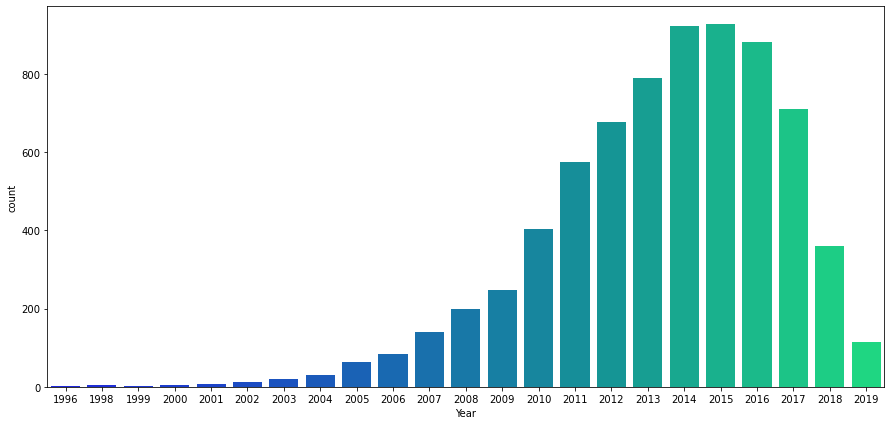

In [40]:
# Let's take a look at how the data varies based on year
plt.figure(figsize=(15,7))
sns.countplot(data["Year"],palette='winter')
plt.show()

#### Observation
It looks like older cars are more rare in our dataset.  The count is not normally distributed.  This is an interesting observation.

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

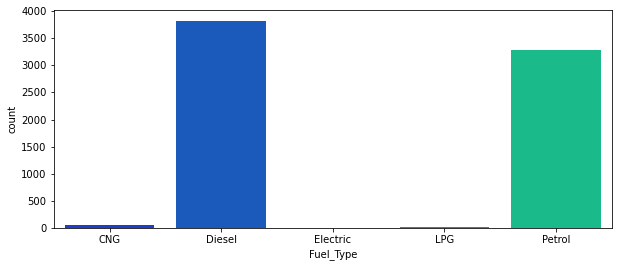

In [41]:
# Univariate distribution to show the age amongst the sample via countplot
plt.figure(figsize=(10,4))
sns.countplot(data['Fuel_Type'], palette='winter')

#### Observations
As expected, Petrol and Diesel are by far the most common Fuel Types. 

<AxesSubplot:xlabel='Transmission', ylabel='count'>

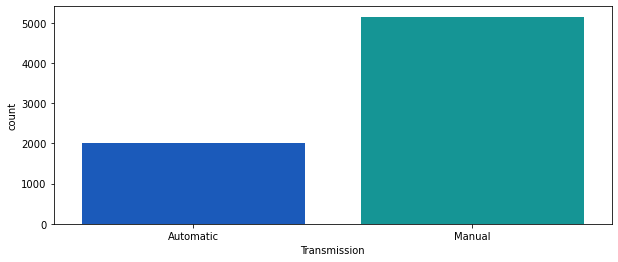

In [42]:
# Univariate distribution to show the Transmission amongst the sample via countplot
plt.figure(figsize=(10,4))
sns.countplot(data['Transmission'], palette='winter')

#### Observations
Surprisingly, manual transmissions more than double our automatic transmissions.

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

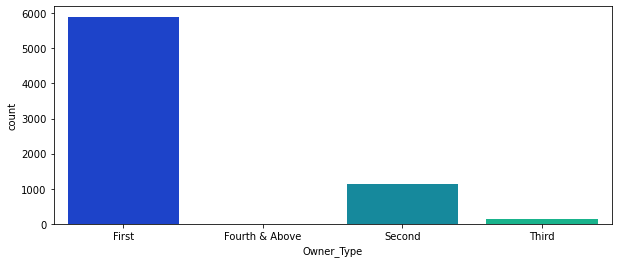

In [43]:
# Univariate distribution to show the Owner_Type amongst the sample via countplot
plt.figure(figsize=(10,4))
sns.countplot(data['Owner_Type'], palette='winter')

#### Observations
An overwhelming majority of our dataset contains one owner cars.

<AxesSubplot:xlabel='Seats', ylabel='count'>

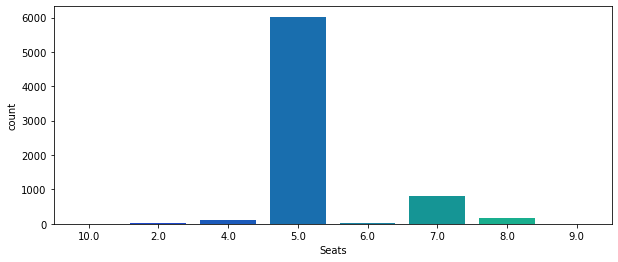

In [44]:
# Univariate distribution to show the Seats amongst the sample via countplot
plt.figure(figsize=(10,4))
sns.countplot(data['Seats'], palette='winter')

#### Observations
As expected, a large majority of cars have 5 seats.  After that, we see 7, which would be standard for large vehicles.

In [45]:
# Defining a function for a histogram.  I will use this to give visuals of the variables.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    sns.set(font_scale=2)  
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True, 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    ) 

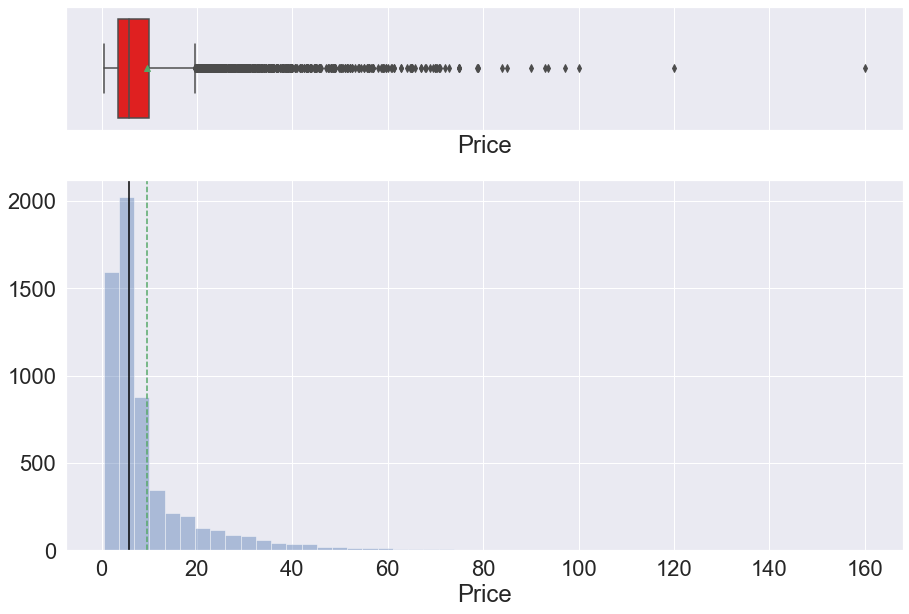

In [46]:
histogram_boxplot(data["Price"])

#### Observations
There are a TON of outliers for Price, we shall conquer this later with log

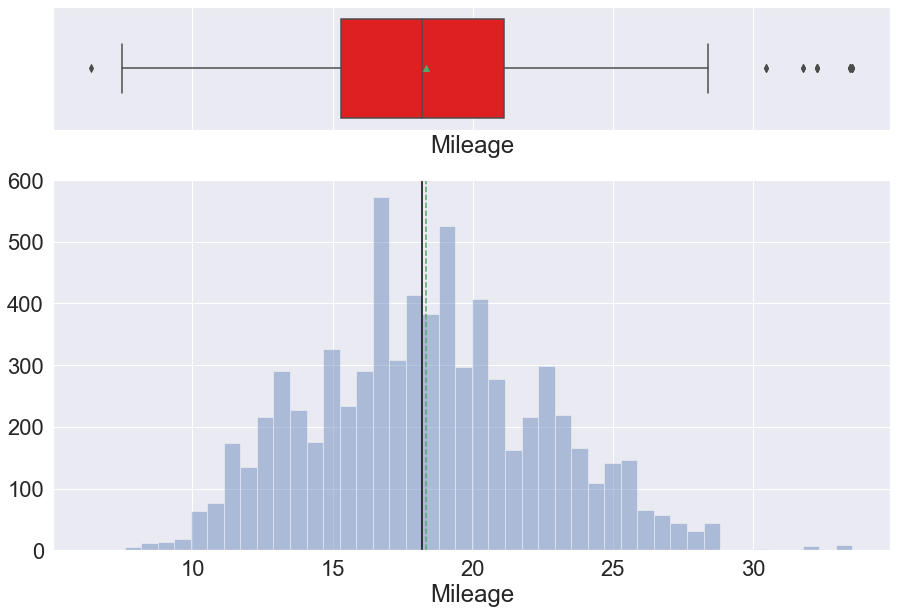

In [47]:
histogram_boxplot(data["Mileage"])

#### Observation
There appears to be a few outliers.  We will tackle these later.

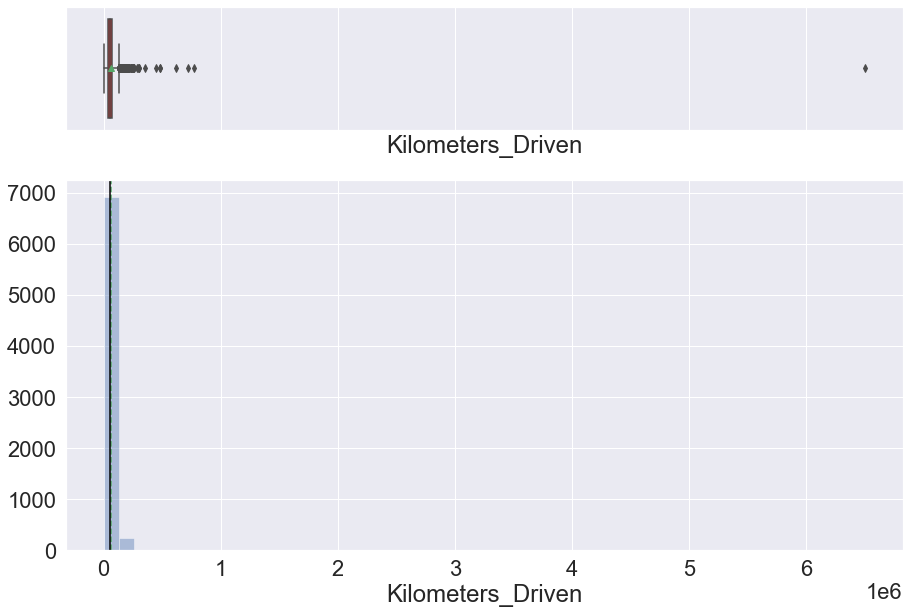

In [48]:
histogram_boxplot(data["Kilometers_Driven"])

#### Observations
Due to extreme outliers for Kilometers Driven, we will need to scale this variable.

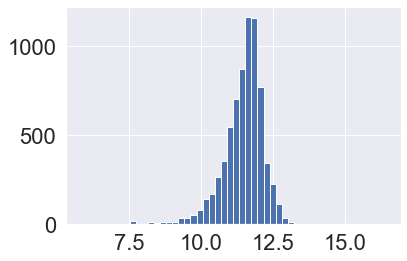

In [49]:
plt.hist(np.arcsinh(data['Kilometers_Driven']), 50)
plt.show()

#### Observation
There are a TON of outliers here.  It is messing with the dispersion a lot.

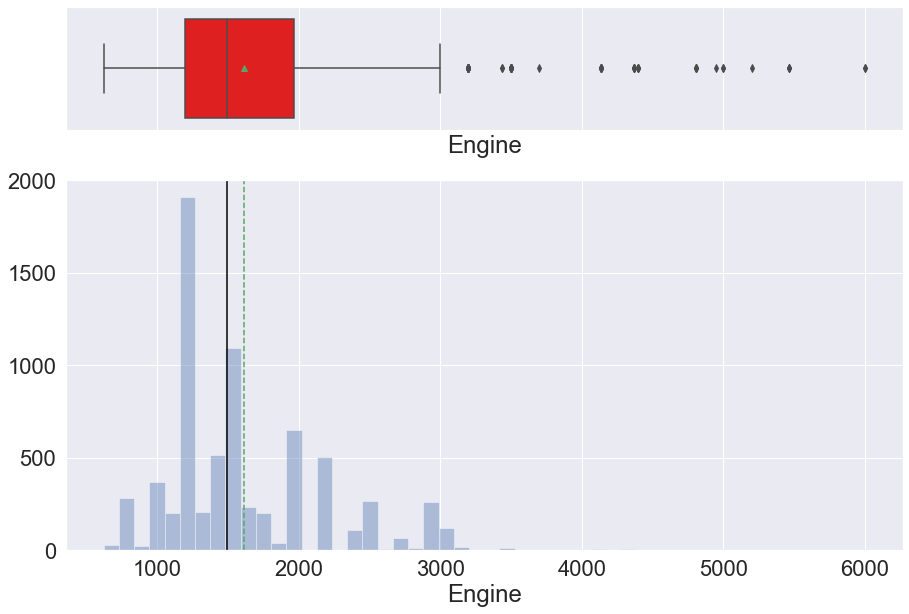

In [50]:
histogram_boxplot(data["Engine"])

#### Observation
This data is more evenly dispersed compared to the other variables.  We see that the mean and median are somewhat close. The mean is higher than the median, indicating a right (positive) skew

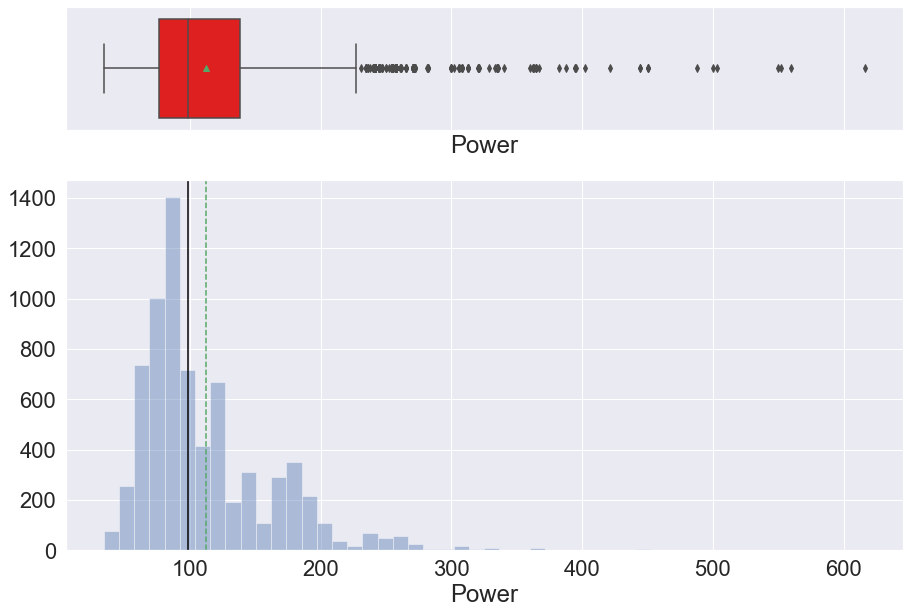

In [51]:
histogram_boxplot(data["Power"])

#### Observation
There are a lot outliers for Power as well. We see that the mean and median are somewhat close. The mean is higher than the median, indicating a right (positive) skew.

<AxesSubplot:xlabel='Mileage', ylabel='Engine'>

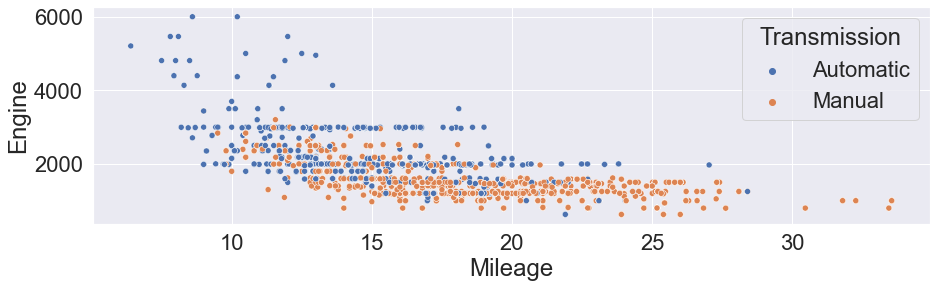

In [52]:
# Multivariate Analysis of Transmission, Engine, and Mileage
plt.figure(figsize=(15,4))
sns.scatterplot(data["Mileage"],data["Engine"],hue=data["Transmission"])

#### Observation
We see that manual engines are clustered lower on Engine.  The outliers for Engine tend to be automatic transmissions.

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

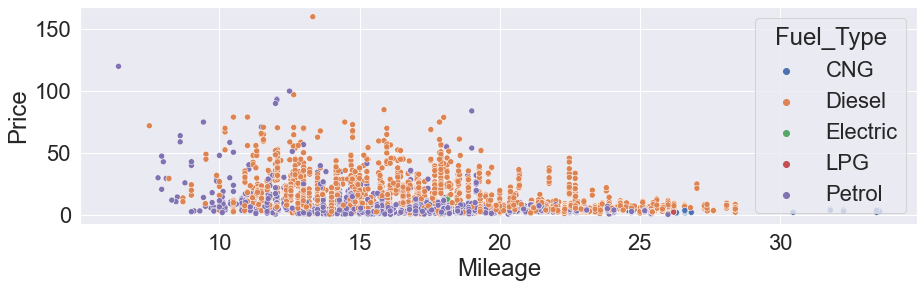

In [53]:
# Multivariate Analysis
plt.figure(figsize=(15,4))
sns.scatterplot(data["Mileage"],data["Price"],hue=data["Fuel_Type"])

#### Observations
The high mileage vehicles tend to cost less, as expected.

<AxesSubplot:xlabel='Engine', ylabel='Power'>

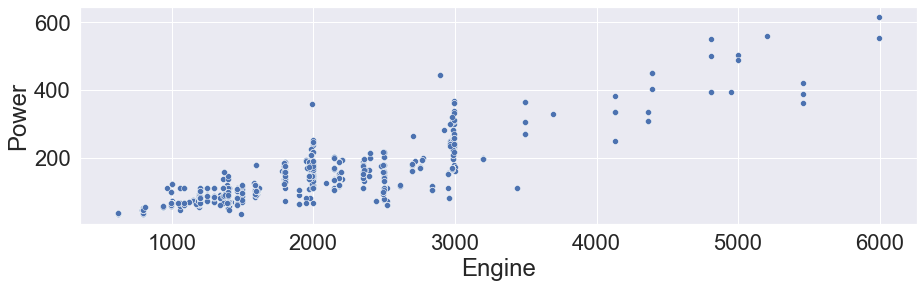

In [54]:
# Multivariate Analysis
plt.figure(figsize=(15,4))
sns.scatterplot(data["Engine"],data["Power"])

#### Observation
We see that there is a positive correlation displayed here between Power and Engine.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Kilometers_Driven'>

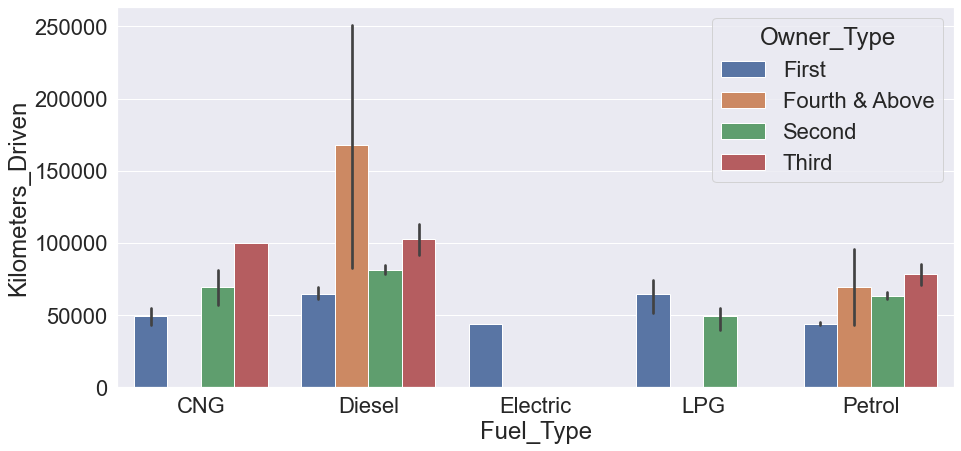

In [55]:
plt.figure(figsize=(15,7))
sns.barplot(data['Fuel_Type'], data['Kilometers_Driven'], hue=data['Owner_Type'])

#### Observations
Not surprising that the more owners, the more Kilometers Driven.

<AxesSubplot:xlabel='Year', ylabel='Price'>

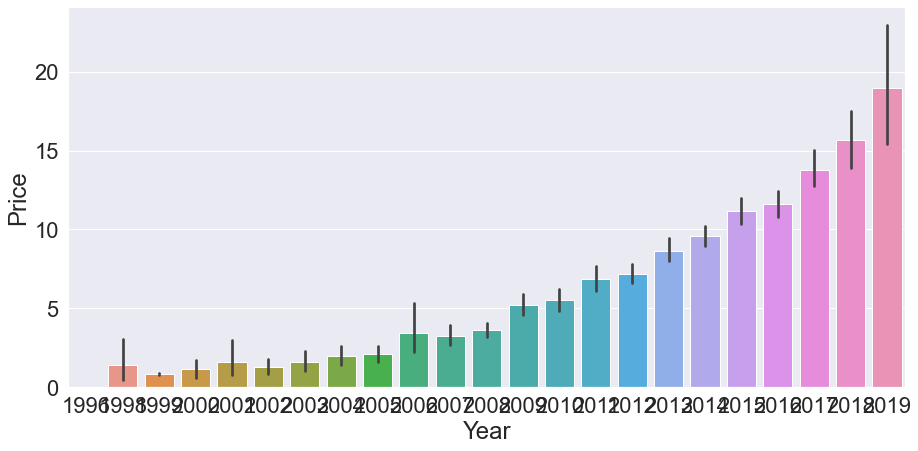

In [56]:
plt.figure(figsize=(15,7))
sns.barplot(data['Year'], data['Price'])

#### Observation
Not surprising that the newer the vehicle, the more expensive.  Strong correlation between year and price.

## Data Preparation for Modeling

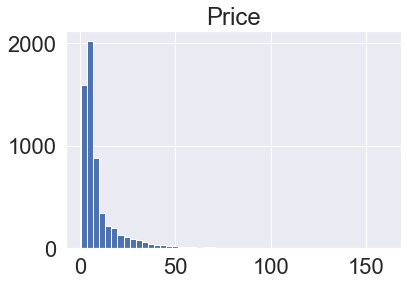

0


In [57]:
# Price is very skewed and would be better on a log scale

cols_to_log = ['Price']
for colname in cols_to_log:
    plt.hist(data[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(data[colname] <= 0))

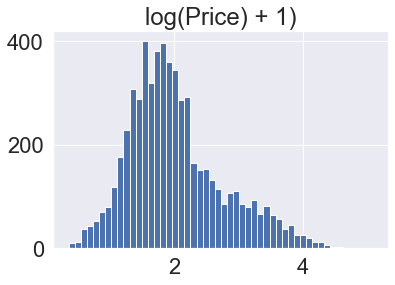

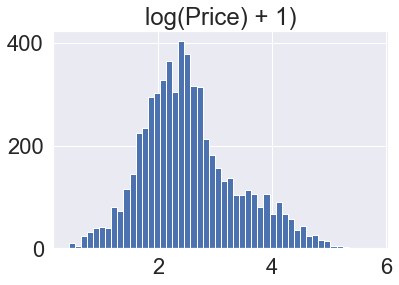

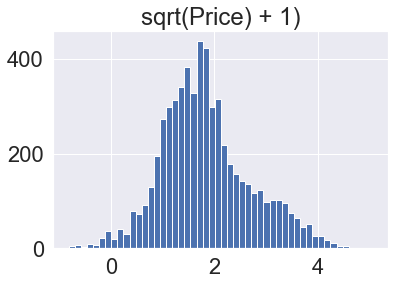

In [58]:
plt.hist(np.log(data['Price']+1), 50)
plt.title('log(Price) + 1)')
plt.show()
plt.hist(np.arcsinh(data['Price']), 50)
plt.title('log(Price) + 1)')
plt.show()
plt.hist(np.log(data['Price']), 50)
plt.title('sqrt(Price) + 1)')
plt.show()

In [59]:
# Replacing Price with Log Scaled version of Price
for colname in cols_to_log:
    data[colname + '_Log'] = np.log(data[colname] + 1)
data.drop(cols_to_log, axis=1, inplace=True)

## Outlier Treatment

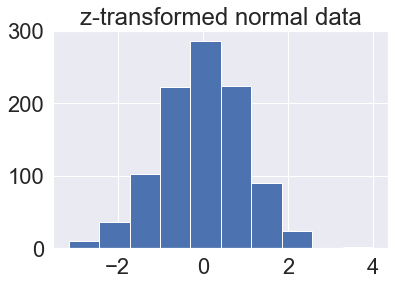

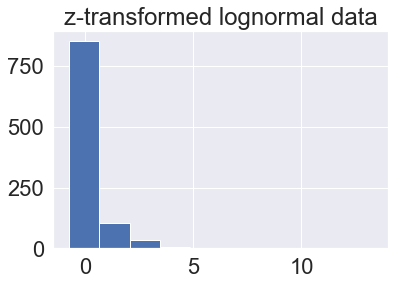

In [60]:
# Using Z-Transformation to flag outliers.

def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()

In [61]:
# Let's flag outliers for each of the variables
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


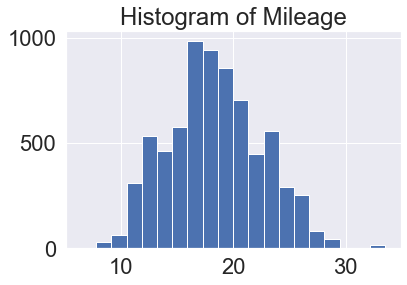

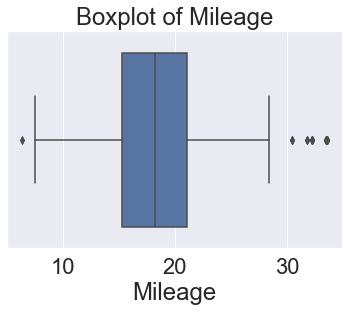

In [62]:
plt.hist(data['Mileage'], 20)
plt.title('Histogram of Mileage')
plt.show()

sns.boxplot(data['Mileage'])
plt.title('Boxplot of Mileage')
plt.show()

In [63]:
quartiles = np.quantile(data['Mileage'][data['Mileage'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers1 = data.loc[np.abs(data['Mileage'] - data['Mileage'].median()) > power_4iqr, 'Mileage']
outlier_powers1

Q1 = 15.3, Q3 = 21.1, 4*IQR = 23.200000000000003


Series([], Name: Mileage, dtype: float64)

In [64]:
data.drop(outlier_powers1.index, axis=0, inplace=True)

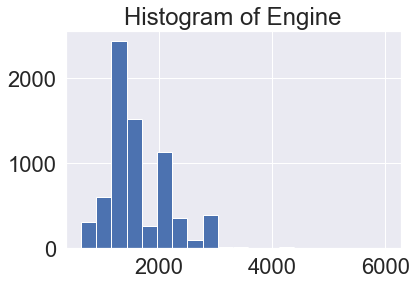

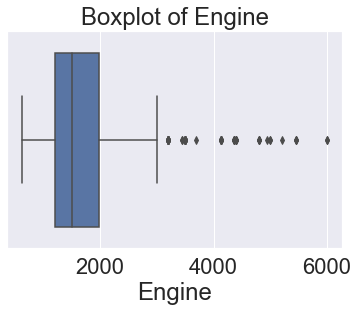

In [65]:
plt.hist(data['Engine'], 20)
plt.title('Histogram of Engine')
plt.show()

sns.boxplot(data['Engine'])
plt.title('Boxplot of Engine')
plt.show()

In [66]:
quartiles = np.quantile(data['Engine'][data['Engine'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers2 = data.loc[np.abs(data['Engine'] - data['Engine'].median()) > power_4iqr, 'Engine']
outlier_powers2

Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0


70      4806.0
152     5461.0
2100    4806.0
2978    4806.0
4451    4951.0
4691    5461.0
4722    5461.0
5088    5000.0
5521    5998.0
5603    4806.0
5781    5204.0
5919    5000.0
6354    5998.0
Name: Engine, dtype: float64

In [67]:
data.drop(outlier_powers2.index, axis=0, inplace=True)

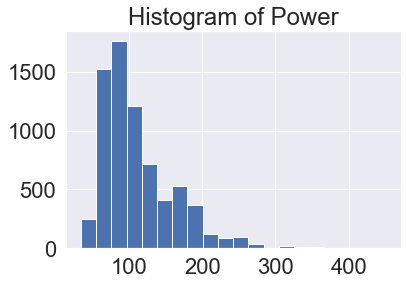

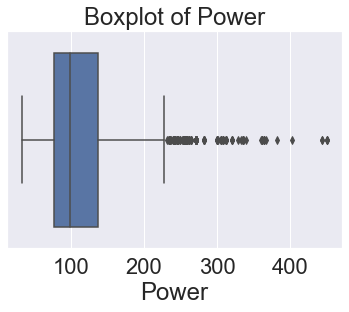

In [68]:
plt.hist(data['Power'], 20)
plt.title('Histogram of Power')
plt.show()

sns.boxplot(data['Power'])
plt.title('Boxplot of Power')
plt.show()

In [69]:
quartiles = np.quantile(data['Power'][data['Power'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers3 = data.loc[np.abs(data['Power'] - data['Power'].median()) > power_4iqr, 'Power']
outlier_powers3

Q1 = 76.8, Q3 = 138.03, 4*IQR = 244.92000000000002


134     362.07
148     444.00
418     367.00
589     364.90
1930    364.90
2095    362.07
3341    402.00
4061    444.00
4342    364.90
4627    450.00
4821    450.00
5341    382.00
6186    364.90
6960    362.07
7057    450.00
7117    360.00
Name: Power, dtype: float64

In [70]:
data.drop(outlier_powers3.index, axis=0, inplace=True)

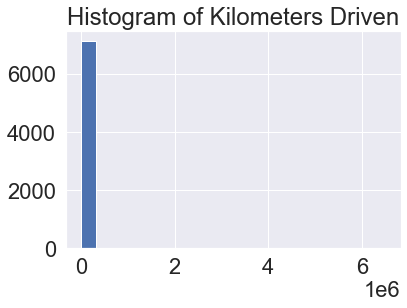

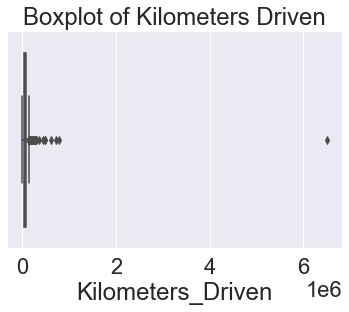

In [71]:
plt.hist(data['Kilometers_Driven'], 20)
plt.title('Histogram of Kilometers Driven')
plt.show()

sns.boxplot(data['Kilometers_Driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

In [72]:
quartiles = np.quantile(data['Kilometers_Driven'][data['Kilometers_Driven'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers4 = data.loc[np.abs(data['Kilometers_Driven'] - data['Kilometers_Driven'].median()) > power_4iqr, 'Kilometers_Driven']
outlier_powers4

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0


29       262000.0
77       230000.0
181      216000.0
340      775000.0
358      620000.0
838      215000.0
1068     225000.0
1101     248000.0
1442     231673.0
1528     299322.0
1766     220000.0
1846     255000.0
1860     720000.0
1975     282000.0
2328    6500000.0
2346     234000.0
2823     480000.0
2988     240000.0
3092     480000.0
3649     300000.0
3713     232000.0
3894     250000.0
4491     445000.0
4719     250000.0
4792     242000.0
5800     210000.0
5834     250000.0
6919     290000.0
6921     350000.0
Name: Kilometers_Driven, dtype: float64

In [73]:
data.drop(outlier_powers4.index, axis=0, inplace=True)

In [74]:
quartiles = np.quantile(data['Price_Log'][data['Price_Log'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers5 = data.loc[np.abs(data['Price_Log'] - data['Price_Log'].median()) > power_4iqr, 'Price_Log']
outlier_powers5

Q1 = 1.5040773967762742, Q3 = 2.379546134130174, 4*IQR = 3.5018749494155994


Series([], Name: Price_Log, dtype: float64)

In [75]:
data.drop(outlier_powers5.index, axis=0, inplace=True)

In [76]:
# Looking after the shape of our dataset post outlier treatment
data.shape

(7112, 13)

In [77]:
# Scaling a couple of variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

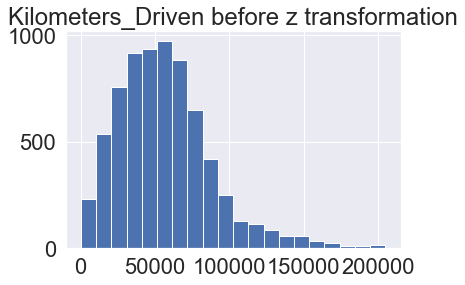

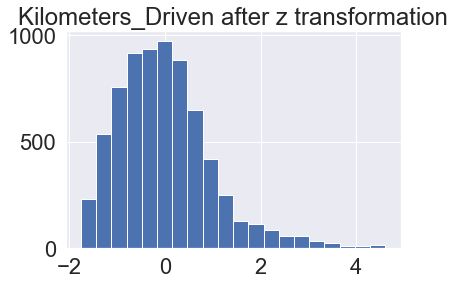

In [78]:
# Due to the large skew on the Kilometers Driven varaible, I am agoing to apply StandardScaler to replace the variable
std_scaler = StandardScaler()

data['Kilometers_Driven'].hist(bins=20)
plt.title('Kilometers_Driven before z transformation')
plt.show()

data['Kilometers_Driven_z_std'] = std_scaler.fit_transform(data[['Kilometers_Driven']])
data['Kilometers_Driven_z_std'].hist(bins=20)
plt.title('Kilometers_Driven after z transformation')
plt.show()
data.drop(['Kilometers_Driven'], axis = 1, inplace=True)

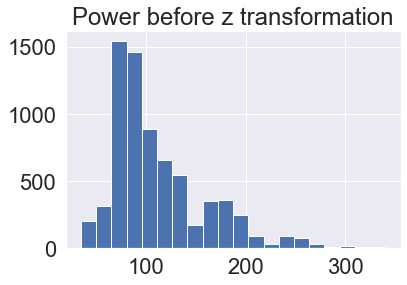

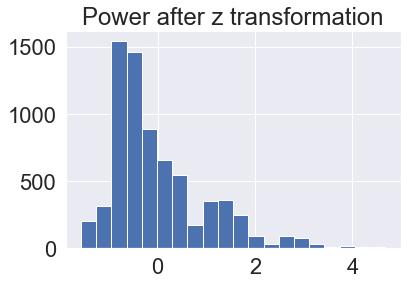

In [79]:
# Due to the large skew on the Power varaible, I am agoing to apply StandardScaler to replace the variable
std_scaler = StandardScaler()

data['Power'].hist(bins=20)
plt.title('Power before z transformation')
plt.show()

data['Power_z_std'] = std_scaler.fit_transform(data[['Power']])
data['Power_z_std'].hist(bins=20)
plt.title('Power after z transformation')
plt.show()
data.drop(['Power'], axis = 1, inplace=True)

In [80]:
# Splitting Name column into a new column "Brand". This is to make it easer for modeling.
data["Brand"]=data["Name"].str.split(" ").str[0]

In [81]:
# Declaring new Brand variable as category
data["Brand"]=data["Brand"].astype("category")

In [82]:
# Dropping Name for the new Brand variable
data.drop(['Name'], axis=1, inplace=True)

In [83]:
# Let's take a look at how the data varies based on Brand
data.Brand.value_counts() 

Maruti           1442
Hyundai          1298
Honda             737
Toyota            493
Volkswagen        371
Mercedes-Benz     353
Ford              348
Mahindra          325
BMW               307
Audi              281
Tata              227
Skoda             198
Renault           170
Chevrolet         150
Nissan            117
Land               57
Jaguar             46
Fiat               37
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Datsun             17
Porsche            14
Force               3
ISUZU               2
Isuzu               2
Hindustan           1
OpelCorsa           1
Ambassador          1
Name: Brand, dtype: int64

In [84]:
# Dropping New_Price
data.drop(['New_Price'], axis = 1, inplace=True)

#### Observations
After comparing the model with New_Price included versus dropped, it seems that it would not be good practice to impute the mean for a large majority of the sample for New_Price.  There is a TON of variance in price for the car makes/models.  Instead, it seems that we should just drop the variable, as it does not drastically impact some of our statistics.  It's a situation where you weigh the costs and benefits.  Do we want to impute the mean, and have most of the sample equal the mean? Do we want to drop all blanks, and have most of our sample be dropped as a result? Or do we want to drop the variable entirely, and keep most of our sample?  I went with option 3 after testing all the options.

In [85]:
# Let's drop the remaining blanks, this will remove Price blanks only because the rest of the columns are taken care of.
data = data.dropna()

In [86]:
data.shape

(5898, 12)

In [87]:
# Defining our x and y variables to perform linear regression on Price (Price_Log)
X = data.drop('Price_Log', axis=1)
y = data[["Price_Log"]]

print(X.head())
print(y.head())

     Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine Seats  \
0      Mumbai  2010       CNG       Manual      First    26.60   998.0   5.0   
1        Pune  2015    Diesel       Manual      First    19.67  1582.0   5.0   
2     Chennai  2011    Petrol       Manual      First    18.20  1199.0   5.0   
3     Chennai  2012    Diesel       Manual      First    20.77  1248.0   7.0   
4  Coimbatore  2013    Diesel    Automatic     Second    15.20  1968.0   5.0   

   Kilometers_Driven_z_std  Power_z_std    Brand  
0                 0.475319    -1.087826   Maruti  
1                -0.487661     0.303315  Hyundai  
2                -0.332342    -0.463407    Honda  
3                 0.941277    -0.462181   Maruti  
4                -0.497912     0.601826     Audi  
   Price_Log
0   1.011601
1   2.602690
2   1.704748
3   1.945910
4   2.930660


In [88]:
# Displaying the shape of x and y
print(X.shape)
print(y.shape)

(5898, 11)
(5898, 1)


In [89]:
# creating dummy variables from our categories
X = pd.get_dummies(X, columns=["Brand", "Year", "Transmission", "Owner_Type", "Fuel_Type", "Seats", "Location"], drop_first=True)
X.head()

,Mileage,Engine,Kilometers_Driven_z_std,Power_z_std,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,26.60,998.0,0.475319,-1.087826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,19.67,1582.0,-0.487661,0.303315,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.20,1199.0,-0.332342,-0.463407,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,20.77,1248.0,0.941277,-0.462181,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,15.20,1968.0,-0.497912,0.601826,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
# Showing the new number of columns after creating dummy variables.  We have gained a lot of columns from our categories
X.shape

(5898, 80)

In [91]:
# Splitting our data into the test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [92]:
# Fitting the model onto our training set.
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [93]:
# Displaying our actual and predicted values from test set. The difference of these are the residuals. 
pred = linearregression.predict(X_test)

data = pd.DataFrame({"Actual": y_test.values.flatten(), "Predicted": pred.flatten()})
data

,Actual,Predicted
0,1.684545,1.581994
1,1.981001,1.865857
2,4.189655,3.940375
3,1.386294,1.700002
4,1.916923,2.028763
...,...,...
1765,1.029619,0.460236
1766,2.242835,2.265356
1767,1.360977,1.369500
1768,3.135059,3.241689


#### Observations
We see here that our actual and predicted values are reasonably close. This is good!

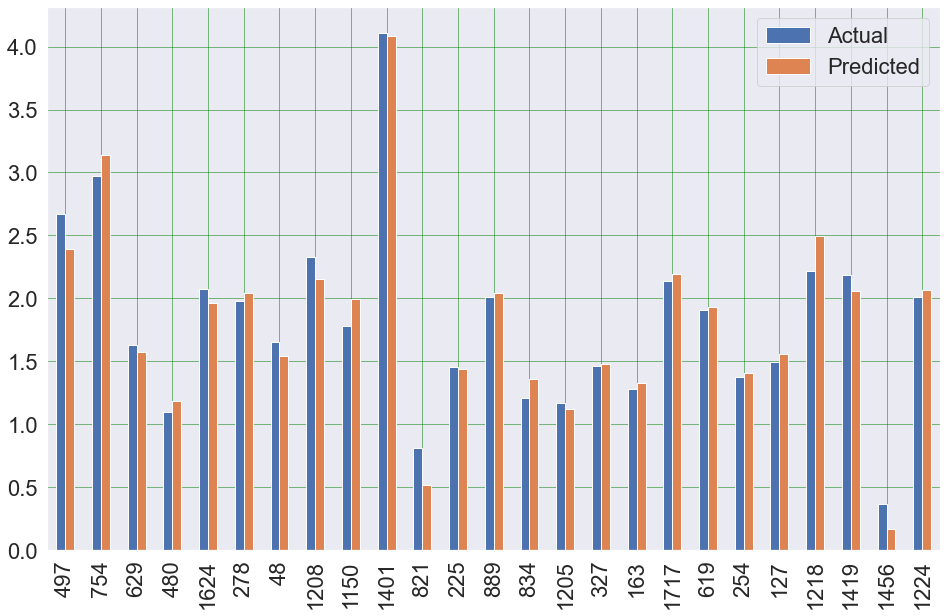

In [94]:
# Let's take a peek at a sample size of 25.  Comparing actual versus predicted, the difference is the residual.
np.random.seed(50)
df1 = data.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [95]:
# Function for calculating Mean Absolute Percentage Error (MAPE)
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# Function to display our MAPE, MAE, RMSE, and R2 for 
def model_perf(model, inp, out):
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [96]:
# Checking model performance on training set
print("Training Performance\n")
print(model_perf(linearregression, X_train, y_train))

Training Performance

        MAE      MAPE      RMSE       R^2
0  0.146399  8.257296  0.195434  0.927677


In [97]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(linearregression, X_test, y_test))

Test Performance

        MAE      MAPE      RMSE       R^2
0  0.144648  8.233095  0.185878  0.939298


#### Observations
-MAE for both the training and test sets are quite comparable.  The magnitude of the residuals is similar

-$R^2$ for both the training and test sets are quite comparable.  This indicates that our model is  good fit. 

In [98]:
# Using statmodels to test the legitimacy of our model
import statsmodels.api as sm

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     727.6
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:40:50   Log-Likelihood:                 904.51
No. Observations:                4128   AIC:                            -1657.
Df Residuals:                    4052   BIC:                            -1176.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [99]:
import statsmodels.api as sm

# Adding a constant to our data because statsmodels needs it done manually!
X_con = sm.add_constant(X)

X_trainc, X_testc, y_trainc, y_testc = train_test_split(
    X_con, y, test_size=0.30, random_state=1
)

In [100]:
model = sm.OLS(y_trainc, X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_Log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     683.7
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:40:50   Log-Likelihood:                 881.72
No. Observations:                4128   AIC:                            -1609.
Df Residuals:                    4051   BIC:                            -1122.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.6875      0.236      7.151      0.000       1.225       2.150
Mileage                      -0.0159      0.001    -10.592      0.000      -0.019      -0.013
Engine                        0.0001   1.81e-05      6.167      0.000     7.6e-05       0.000
Kilometers_Driven_z_std      -0.0472      0.004    -10.757      0.000      -0.056      -0.039
Power_z_std                   0.2359      0.009     25.626      0.000       0.218       0.254
Brand_Audi                    0.4774      0.209      2.288      0.022       0.068       0.887
Brand_BMW                     0.4526      0.209      2.166      0.030       0.043       0.862
Brand_Chevrolet              -0.2822      0.209     -1.352      0.177      -0.692       0.127
Brand_Datsun                 -0.3833      0.218     -1.757      0.079      -0.811       0.044
Brand_Fiat                   -0.2413      0.212     -1.139      0.255      -0.657       0.174
Brand_Force                  -0.0712      0.251     -0.284      0.777      -0.563       0.420
Brand_Ford                   -0.0943      0.208     -0.454      0.650      -0.502       0.313
Brand_Hindustan            8.976e-16   1.92e-15      0.468      0.640   -2.87e-15    4.66e-15
Brand_Honda                  -0.0119      0.208     -0.057      0.954      -0.420       0.396
Brand_Hyundai                -0.0372      0.208     -0.179      0.858      -0.445       0.370
Brand_ISUZU                  -0.3190      0.250     -1.274      0.203      -0.810       0.172
Brand_Isuzu                  -0.1081      0.287     -0.376      0.707      -0.671       0.455
Brand_Jaguar                  0.5263      0.212      2.479      0.013       0.110       0.943
Brand_Jeep                    0.1445      0.218      0.662      0.508      -0.283       0.572
Brand_Land                    0.7975      0.211      3.781      0.000       0.384       1.211
Brand_Mahindra               -0.1924      0.208     -0.923      0.356      -0.601       0.216
Brand_Maruti                 -0.0233      0.208     -0.112      0.911      -0.431       0.384
Brand_Mercedes-Benz           0.5099      0.209      2.445      0.015       0.101       0.919
Brand_Mini                    0.8541      0.214      3.995      0.000       0.435       1.273
Brand_Mitsubishi              0.1648      0.213      0.774      0.439      -0.252       0.582
Brand_Nissan                 -0.0569      0.209     -0.272      0.785      -0.466       0.353
Brand_OpelCorsa            3.125e-16   1.19e-15      0.263      0.793   -2.02e-15    2.64e-15
Brand_Porsche                 0.4903      0.219      2.238      0.025       0.061       0.920
Brand_Renault                -0.0869      0.209     -0.417      0.677      -0.496       0.322
Brand_Skoda                   0.0429      0.208      0.206      0.837      

In [101]:
# Let's take a look at our VIF scores. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                       0.000000
Mileage                     4.073060
Engine                     11.014590
Kilometers_Driven_z_std     1.975507
Power_z_std                 9.227361
                             ...    
Location_Jaipur             2.714561
Location_Kochi              3.662821
Location_Kolkata            3.165133
Location_Mumbai             4.028098
Location_Pune               3.454876
Length: 81, dtype: float64



#### Observation

Due to VIF of Engine, let's drop it and re-run our model

In [102]:
# we drop Engine to due its VIF value being the highest and over 10.
X_train2 = X_train1.drop("Engine", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                      0.000000
Mileage                    3.678925
Kilometers_Driven_z_std    1.993313
Power_z_std                4.884613
Brand_Audi                      inf
                             ...   
Location_Jaipur            2.636906
Location_Kochi             3.579659
Location_Kolkata           3.117849
Location_Mumbai            4.050487
Location_Pune              3.506670
Length: 80, dtype: float64



#### Observation
After dropping Engine, the assumption of multicollinearity is valid!

In [103]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     727.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:40:52   Log-Likelihood:                 876.86
No. Observations:                4128   AIC:                            -1604.
Df Residuals:                    4053   BIC:                            -1129.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [104]:
# Displaying our residual average to be close to zero
residual = olsres1.resid
np.mean(residual)

3.9993982501301255e-14

#### Observation

It is incredibly close to zero after dropping Engine. This assumption is valid!

In [105]:
residual = olsres1.resid
fitted = olsres1.fittedvalues

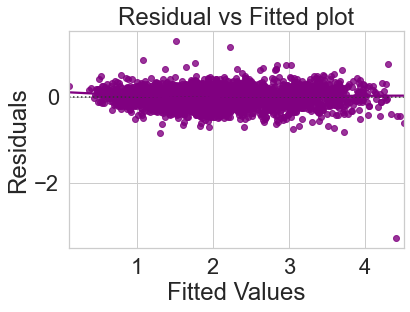

In [106]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

#### Observation
We do not see a pattern on the plot above, the assumption is valid!

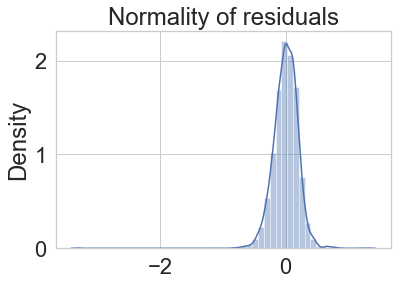

In [107]:
# Testing for normality of Residuals
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

#### Observation
We see that the residuals are normally distributed over zero. This assumption is valid!

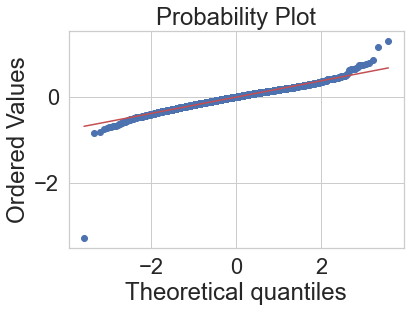

In [108]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

#### Observation
another check on nomrality of residuals.  The line is straight, and the assumption is valid!

In [109]:
# Testing for Homoskedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 0.9064266238093366), ('p-value', 0.9857999780228677)]

#### Observations
Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is valid!

*All of our assumptions are valid!*


### Test Data Prediction

In [110]:
# Looking at the columns of our new test data.
X_train2.columns

Index(['const', 'Mileage', 'Kilometers_Driven_z_std', 'Power_z_std',
       'Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Datsun',
       'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Hindustan',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_OpelCorsa', 'Brand_Porsche', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo', 'Year_1998', 'Year_1999', 'Year_2000', 'Year_2001',
       'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006',
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type

In [111]:
# Creating the variable for our official model
X_test_official = X_test[X_train2.columns]

In [112]:
X_test_official.head()

,const,Mileage,Kilometers_Driven_z_std,Power_z_std,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
5861,1.0,17.00,0.692766,0.028628,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2027,1.0,18.90,1.376171,-0.905040,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1804,1.0,22.32,0.834355,0.305769,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3848,1.0,18.90,0.361843,-0.905040,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5509,1.0,25.17,-0.953619,-1.187194,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [113]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.146724,8.312563,0.195664,0.929951


In [114]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(olsres1, X_test_official.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.14409,8.152092,0.18696,0.93358


* For both test and training data, model has a low MAE and RMSE so it is not overfit.

* The model is fit to account for roughly 93% of instances

* The MAPE on the test set suggests we can predict within 8.2% of Price.

In [115]:
# Printing our official model summary
olsmod3 = sm.OLS(y_train, X_train2)
olsres2 = olsmod1.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     727.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:40:54   Log-Likelihood:                 876.86
No. Observations:                4128   AIC:                            -1604.
Df Residuals:                    4053   BIC:                            -1129.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Conclusion

1. As kilometers driven goes up, Price of the vehicle goes down.

2. We see based off of the Year coefficients, as the car gets older, it drastically decreases in value.

3. Two seater vehicles increase the value of the vehicle.  This could be due to other characteristics of the car.

4. Certain brand depreciate more.  For example, Porsche holds value better than Chevrolet.

To grow the business, I recommend that Cars4U to target certain brands with higher coefficients. For example, they should target BMW and Audi over Ford.  They should also target certain locations.  Specifically, target Kolkata and Bangalore.

Cars4U should NEVER sell below the price the model produces.

